In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as npr
import time

In [2]:
from MetropolisHastings import MetropolisHastings
from ConsensusMH import ConsensusMH
from FlyMH import FlyMH
from csMALA import csMALA

[[1.         2.        ]
 [0.98245217 2.02893903]
 [1.00134574 2.02133243]
 [1.00392284 2.046067  ]
 [1.00392284 2.046067  ]
 [1.01161026 2.05466219]
 [1.01161026 2.05466219]
 [1.02222669 2.04759011]
 [1.01435599 2.04844589]
 [1.00846631 2.07403365]
 [0.9918323  2.08558358]
 [1.01023512 2.10191406]
 [1.01995421 2.09580023]
 [1.0161515  2.10091448]
 [1.04636109 2.11787874]
 [1.03878251 2.16008566]
 [1.03088869 2.14639942]
 [1.03245067 2.18611539]
 [1.02926001 2.17158652]
 [1.03762102 2.1827992 ]
 [1.02948534 2.19019308]
 [1.02198947 2.18835486]
 [1.01934708 2.18105133]
 [1.01165527 2.17520726]
 [0.97560101 2.1843326 ]
 [0.97560101 2.1843326 ]
 [0.95435976 2.19550921]
 [0.95540213 2.21734351]
 [0.95280869 2.20174547]
 [0.95811251 2.22445467]
 [0.95422451 2.23686153]
 [0.95006049 2.24234858]
 [0.93756893 2.24917102]
 [0.94192507 2.25431572]
 [0.93962994 2.25429802]
 [0.91345987 2.26299595]
 [0.91345987 2.26299595]
 [0.90072588 2.26364906]
 [0.92146288 2.28025222]
 [0.94861469 2.31265732]


In [9]:
npr.seed(1)
N = 100000
#dataType = "Gaussian"
dataType = "logNormal"
if dataType == "Gaussian":
    x = npr.randn(N)
elif dataType == "logNormal":
    x = npr.lognormal(0,1, N)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(x)
realStd = np.std(x)
print(f"Mean of x = {realMean}")
print(f"Std of x = {realStd}")
MAP = np.array([realMean,realStd])
print(x)

Mean of x = 1.6556605601701955
Std of x = 2.16504884554378
[5.07509561 0.54239736 0.58968207 ... 1.08461525 1.41064377 0.47352231]


In [4]:
def plt_samples(Samples):
    sns.jointplot(x=Samples[:,0],y=Samples[:,1])

## VanillaMH

c:\Users\fynno\Desktop\bt_MCMC_big_data\MetropolisHastings.py:35: RuntimeWarning: invalid value encountered in log
  return -(((data - theta[0])/np.exp(theta)[1])**2)/2 - np.log(theta[1]*np.sqrt(np.pi*2)) # -((data-mu)/sig)**2 - log(sig)


Execution time: 8.296822 seconds
[[1.65566056e+00 2.16504885e+00]
 [1.65566056e+00 2.16504885e+00]
 [1.65579786e+00 2.16435159e+00]
 ...
 [1.65804046e+00 3.12399836e-07]
 [1.65804046e+00 3.12399836e-07]
 [1.65804046e+00 3.12399836e-07]]


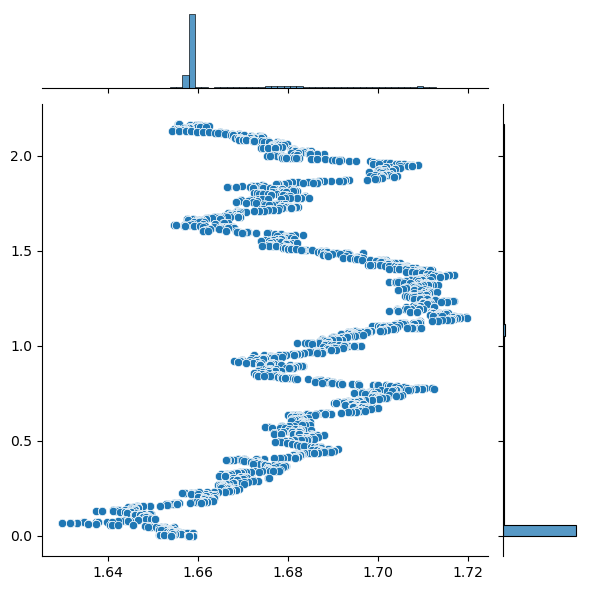

In [10]:
T = 10000
test_vanillMH = MetropolisHastings(x)

start_time = time.time()
test_vanillMH_run = test_vanillMH.run(T, MAP)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
print(test_vanillMH_run)
plt_samples(test_vanillMH_run)

## ConsensusMH

Execution time: 6.433782 seconds


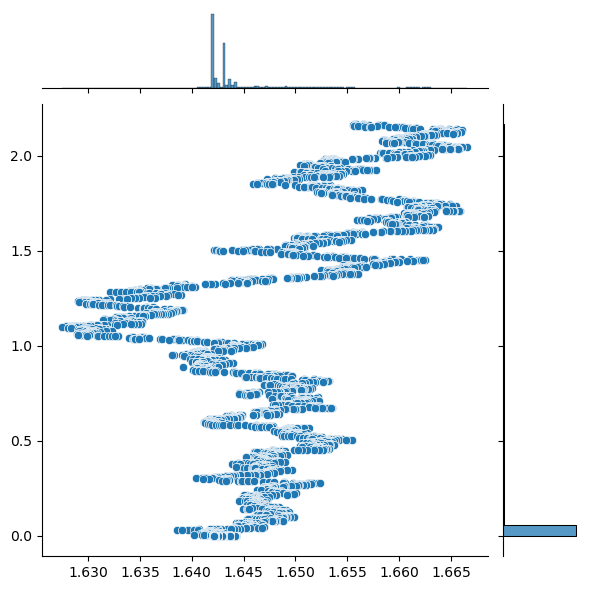

In [6]:
num_batches = 4
T = 10000

test_consMH = ConsensusMH(dataset = x, num_batches=num_batches)

start_time = time.time()
test_consMH_run = test_consMH.run(T, MAP)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
plt_samples(test_consMH_run)

## FlyMH


c:\Users\fynno\Desktop\bt_MCMC_big_data\FlyMH.py:33: RuntimeWarning: invalid value encountered in log
  log_lkhd_new = np.log(self.get_lkhd(theta_new, data)/ self.bounding_function(theta_new) -1)
c:\Users\fynno\Desktop\bt_MCMC_big_data\FlyMH.py:34: RuntimeWarning: invalid value encountered in log
  log_lkhd_old = np.log(self.get_lkhd(theta, data) / self.bounding_function(theta) - 1)


Execution time: 5.470386 seconds


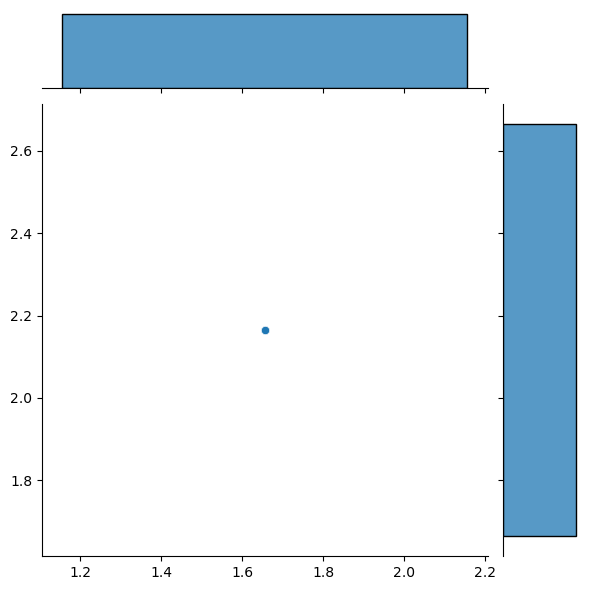

In [7]:
batch_percentage = 0.9
T = 1000

test_FlyMH = FlyMH(dataset = x, sample_fraction=batch_percentage)

start_time = time.time()
test_FlyMH_run = test_FlyMH.run(T, MAP)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
plt_samples(test_FlyMH_run)

## csMALA

corr_term: -0.0
r: [-1.7223700051129125, array([0.00045063, 0.00195396])]
location: [1.65565985 2.16504576]
theta_new:[1.52252305 2.23679759]
corr_term: -0.0
r: [-1.7739715906824847, array([ 0.0029028 , -0.05165611])]
alpha: 1.0040209555911992
location: [1.63887059 2.2968783 ]
theta_new:[1.72111309 2.26146242]
corr_term: -0.0
r: [-1.7846478543602897, array([ 0.00142382, -0.05918535])]
alpha: 1.0080062208711207
location: [1.65031537 2.32435517]
theta_new:[1.76795053 2.49979659]
corr_term: -0.0
r: [-1.7976005852948131, array([-0.01594392, -0.06152794])]
alpha: 1.0042627044682182
location: [1.74377576 2.35702797]
theta_new:[1.76944917 2.55076453]
corr_term: -0.0
r: [-1.8498016157660622, array([-0.00894872, -0.0989543 ])]
alpha: 1.012003221578343
location: [1.70937646 2.49679414]
theta_new:[1.72587256 2.50801624]
corr_term: -0.0
r: [-1.801346326357707, array([-0.03373445, -0.06555304])]
alpha: 0.9933703658619951
location: [1.84445803 2.36704935]
theta_new:[1.83064384 2.53825924]
corr_term:

c:\Users\fynno\Desktop\bt_MCMC_big_data\MetropolisHastings.py:35: RuntimeWarning: invalid value encountered in log
  return -(((data - theta[0])/np.exp(theta)[1])**2)/2 - np.log(theta[1]*np.sqrt(np.pi*2)) # -((data-mu)/sig)**2 - log(sig)


location: [ 0.51779506 -0.84439333]
theta_new:[ 0.5124627  -0.93207822]
corr_term: -0.0
r: [nan, array([  1.99704005, -11.27965998])]
alpha: nan
location: [ 0.51779506 -0.84439333]
theta_new:[ 0.54700214 -0.69096115]
corr_term: -0.0
r: [nan, array([ 1.33303283, -7.86245964])]
alpha: nan
location: [ 0.51779506 -0.84439333]
theta_new:[ 0.51222161 -0.65486364]
corr_term: -0.0
r: [nan, array([  2.21513926, -13.86212063])]
alpha: nan
location: [ 0.51779506 -0.84439333]
theta_new:[ 0.49939486 -0.85963883]
corr_term: -0.0
r: [nan, array([ 1.51952342, -7.72504129])]
alpha: nan
location: [ 0.51779506 -0.84439333]
theta_new:[ 0.5060171  -0.85023855]
corr_term: -0.0
r: [nan, array([ 1.40171446, -8.32733731])]
alpha: nan
location: [ 0.51779506 -0.84439333]
theta_new:[ 0.45955663 -0.7430059 ]
corr_term: -0.0
r: [nan, array([  2.36568054, -14.28474921])]
alpha: nan
location: [ 0.51779506 -0.84439333]
theta_new:[ 0.58922661 -0.84379299]
corr_term: -0.0
r: [nan, array([ 1.75127972, -9.22331621])]
alph

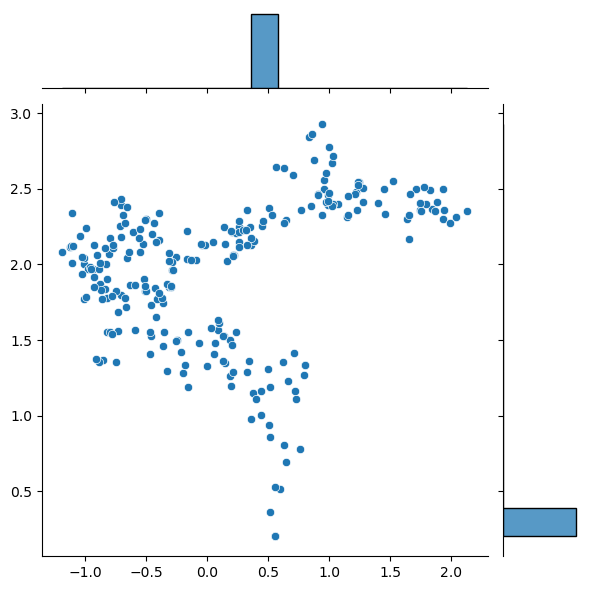

In [8]:
batch_percentage = 0.9
T = 10000

test_csMALA = csMALA(dataset = x, batch_percentage=batch_percentage)

start_time = time.time()
test_csMALA_run = test_csMALA.run(T, MAP)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
plt_samples(test_csMALA_run)